### Стратегии управления запасами и заказами

&#8195;&#8195; Задача управления запасами возникает, когда необходимо создать запас материальных ресурсов или предметов потребления с целью удовлетворения спроса на заданном интервале времени (конечном или бесконечном). 
    
&#8195;&#8195; Для обеспечения непрерывного и эффективного функционирования практически любой организации необходимо создание запасов.

#### Постановка задачи

&#8195;&#8195; Задача управления запасами в общем случае формулируется следующим образом: определить оптимальный размер запаса, размер, частоту и сроки поставки заказа, минимизирующие суммарные затраты. В затраты обычно входит стоимость закупки, доставки и хранения продукции.
&#8195;&#8195; Существуют различные модели или задачи управления запасами, соответствующие различным входным условиям и внутренним требованиям исследуемой системы. Расчет моделей позволяет минимизировать затраты на закупку, доставку заказов и хранение запасов, то есть оптимизировать работу логистической системы предприятия.

#### Модель Уилсона

&#8195;&#8195; Математические модели управления запасами (УЗ) позволяют найти оптимальный уровень запасов некоторого товара, минимизирующий суммарные затраты на покупку, оформление и доставку заказа, хранение товара, а также убытки от его дефицита. Модель Уилсона является простейшей моделью УЗ и описывает ситуацию закупки продукции у внешнего поставщика, которая характеризуется следующими допущениями:

- интенсивность потребления является априорно известной и постоянной величиной;
- заказ доставляется со склада, на котором хранится ранее произведенный товар;
- время поставки заказа является известной и постоянной величиной;
- каждый заказ поставляется в виде одной партии;
- затраты на осуществление заказа не зависят от размера заказа;
- затраты на хранение запаса пропорциональны его размеру;
- отсутствие запаса (дефицит) является недопустимым.

Входные параметры модели Уилсона:

- $\upsilon$ – интенсивность (скорость) потребления запаса, [ед.тов./ед.t];
- s – затраты на хранение запаса, [руб./ед.тов.ед.t];
- K - затраты на осуществление заказа, включающие оформление и доставку заказа, [руб.];
- $t_{\text{д}}$ – время доставки заказа, [ед.t].

Выходные параметры модели Уилсона:

- Q – размер заказа, [ед.тов.];
- L – общие затраты на управление запасами в единицу времени, [руб./ед.t];
- $\tau$ – период поставки, т.е. время между подачами заказа или между поставками, [ед.t];
- $h_0$ – точка заказа, т.е. размер запаса на складе, при котором надо подавать заказ на доставку очередной партии, [ед. тов.].

#### Практическое применение стратегии управления запасами и заказами

Пример:

&#8195;&#8195; На некотором станке производятся детали в количестве 2000 штук в месяц. Эти детали используются для производства продукции на другом станке с интенсивностью 500 шт. в месяц. По оценкам специалистов компании, издержки хранения составляют 50 коп. в год за одну деталь. Стоимость производства одной детали равна 2,50 руб., а стоимость на подготовку производства составляет 1000 руб. Каким должен быть размер партии деталей?

#### Формулы модели экономичного размера партии

$Q_w^*$=$\sqrt{\frac{2K\upsilon\lambda}{s(\lambda-\upsilon)}}$ $\qquad$ или $\qquad$ $Q_w^*$=$\sqrt{\frac{2K\upsilon}{S(1-\upsilon/\lambda)}}$

где * – означает оптимальность размера заказа;

L=$K\cdot\frac{\upsilon}{Q}+s\cdot\frac{Q(\lambda-\upsilon)}{2\lambda}$ $\qquad$ или $\qquad$ L=$K\cdot\frac{\upsilon}{Q}+s\cdot\frac{Q(  -\upsilon/\lambda)}{2}$;\\
H=$\frac{Q(\lambda-\upsilon}{\lambda}$ $\qquad$ или $\qquad$ H=Q(1-$\upsilon/\lambda$);\\
$\tau$=$\frac{Q}{\upsilon}$;\\
$h_0=\upsilon t_{\text{п}}$.

#### Ниже представлен пример, который использует некоторый набор данных и описанные выше формулы, для графически наглядного решения задачи.

In [1]:
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import HTML

%matplotlib inline

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Нажмите на кнопку чтобы увидеть код"></form>''')

In [2]:
import numpy as np

class Simulation: 
    
    unit_holding_cost = 1
    order_setup_cost = 200
    unit_purchase_cost = 500
    unit_sales_price = 1000
    inventory_lead_time = 2
    def __init__(self, reorder_point, order_quantity):
        self.inventory_level = order_quantity 
        self.order_size = 0 
        self.clock = 0.0  
        self.clock_order_rec = self.generate_order_freq()   
        self.clock_inventory_rec = float('inf')     
        self.sales = 0    
        self.purchase_cost = 0   
        self.order_cost = 0
        self.holding_cost = 0
        self.order_quantity = order_quantity
        self.reorder_point = reorder_point
    def main(self):
        clock_event = min(self.clock_order_rec, self.clock_inventory_rec) 

        self.clock_update = clock_event
        
        if self.clock_inventory_rec < self.clock_order_rec:  
            self.rec_inventory_event()   
        else:
            self.sales_purchase_event()
            
        avg_inventory_level = abs(self.inventory_level + self.inventory_level_update)/2
        self.holding_cost +=  avg_inventory_level * s.unit_holding_cost * (self.clock_update - self.clock)
            
        self.clock = self.clock_update  
        self.inventory_level = self.inventory_level_update
    def sales_purchase_event(self):
        demand = self.generate_order_quantity() 
        
        if self.inventory_level > demand:
            self.sales += s.unit_sales_price * demand   
            self.inventory_level_update = self.inventory_level - demand   
        else:
            self.sales += s.unit_sales_price * self.inventory_level   
            self.inventory_level_update = 0    
            
        if self.inventory_level <= self.reorder_point and self.order_size == 0: 
            self.order_size = self.order_quantity
            self.purchase_cost += s.unit_purchase_cost * self.order_size  
            self.order_cost += s.order_setup_cost
            self.clock_inventory_rec = self.clock_update + s.inventory_lead_time 
            
        self.clock_order_rec = self.clock_update + self.generate_order_freq()
    def rec_inventory_event(self):
        self.inventory_level_update = self.inventory_level + self.order_size
        self.order_size = 0 
        self.clock_inventory_rec = float('inf')
    def rec_inventory_event(self):
        self.inventory_level_update = self.inventory_level + self.order_size
        self.order_size = 0 
        self.clock_inventory_rec = float('inf')
    def generate_order_freq(self): 
        return np.random.randint(1, 2) 
    
    def generate_order_quantity(self):
        return np.random.randint(10, 11)

In [3]:
np.random.seed(0)

orderCost = []
orderQty = []
holdingCost = []

ord_qty = [40, 50, 60, 70, 80, 90, 100]

for i in ord_qty:
    s = Simulation(30, i)

    while s.clock < 240:
        s.main() 
            
    orderCost.append(s.order_cost)   
    holdingCost.append(s.holding_cost)
    orderQty.append(i)

<IPython.core.display.Javascript object>


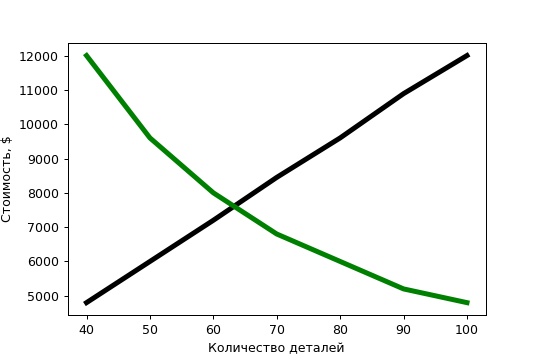

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.plot(orderQty,holdingCost,color='k', lw=4)
plt.plot(orderQty,orderCost,color='g', lw=4)
plt.xlabel('Количество деталей')
plt.ylabel('Стоимость, $')
plt.show()

#### По данному графику можно понять, что оптимальный размер партии товара получается при 63 деталях в одной партии, и при общей стоимости деталей в 7604$